In [24]:
import pandas as pd # импортируем библиотеку для работы с таблицами
import numpy as np # библиотека для вычисления, преобразования матриц
# библиотеки для построения графиков, диаграмм, визуализаций
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

### 1. Ознакомление с данными

In [25]:
df = pd.read_excel('students_mfti.xlsx') # Загрузка данных из файла
df.head() # посмотрим на 1-е пять строк в таблице

,Год,Общая численность студентов,Средний балл ЕГЭ,Общая численность иностранных студентов,Доходы вуза из всех источников (тыс. руб.),Доля доходов вуза от образовательной деятельности (%),Заработная плата ППС (тыс. руб.),Число научных публикаций на 100 НПР,Доля платных студентов (%),Кол-во ППС (без внешних совместителей),Доля ППС с учёной степенью (%),Количество персональных компьютеров на 1 студента
0,2024,8381,98.01,887,16628292.9,42.55,218.59,313.85,10.58,307,74.59,0.37
1,2023,8237,97.13,1168,13760323.2,39.41,201.75,338.41,14.18,309,75.40,0.37
2,2022,7664,95.81,1261,10449045.6,42.68,188.87,415.08,16.45,331,75.23,0.39
3,2021,7178,95.83,1034,9528324.6,41.89,179.95,363.48,14.41,360,74.72,0.42
4,2020,6730,95.57,844,9351851.8,42.08,189.46,399.21,12.54,404,71.53,0.42


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Год                                                    10 non-null     int64  
 1   Общая численность студентов                            10 non-null     int64  
 2   Средний балл ЕГЭ                                       10 non-null     float64
 3   Общая численность иностранных студентов                10 non-null     int64  
 4   Доходы вуза из всех источников (тыс. руб.)             10 non-null     float64
 5   Доля доходов вуза от образовательной деятельности (%)  10 non-null     float64
 6   Заработная плата ППС (тыс. руб.)                       10 non-null     float64
 7   Число научных публикаций на 100 НПР                    10 non-null     float64
 8   Доля платных студентов (%)                           

In [27]:
# Заполнение пропусков медианой для некоторых столбцов
df[['Заработная плата ППС (тыс. руб.)', 
    'Число научных публикаций на 100 НПР', 
    'Доля доходов вуза от образовательной деятельности (%)', 
    'Доля ППС с учёной степенью (%)']] = df[['Заработная плата ППС (тыс. руб.)', 
                                              'Число научных публикаций на 100 НПР', 
                                              'Доля доходов вуза от образовательной деятельности (%)', 
                                              'Доля ППС с учёной степенью (%)']].fillna(df.median())

# Линейная интерполяция для оставшихся столбцов
df[['Общая численность студентов', 
    'Кол-во ППС (без внешних совместителей)']] = df[['Общая численность студентов', 
                                                      'Кол-во ППС (без внешних совместителей)']].interpolate(method='linear')

# Проверка на пустые значения (проверим, что все столбцы заполнились)
df = df.fillna(method='bfill')  # Заполнение оставшихся пропусков с помощью обратной интерполяции

# Если в конце остаются пропуски, можно заполнить их предыдущими значениями:
df = df.fillna(method='ffill')  # Заполнение пропусков вперед значениями

In [28]:
# Сортируем данные по столбцу "Год" по убыванию
df = df.set_index('Год')
df = df.sort_index(ascending=True)
df.head()

,Общая численность студентов,Средний балл ЕГЭ,Общая численность иностранных студентов,Доходы вуза из всех источников (тыс. руб.),Доля доходов вуза от образовательной деятельности (%),Заработная плата ППС (тыс. руб.),Число научных публикаций на 100 НПР,Доля платных студентов (%),Кол-во ППС (без внешних совместителей),Доля ППС с учёной степенью (%),Количество персональных компьютеров на 1 студента
Год,,,,,,,,,,,
2015,5611,92.90,521,5323372.8,34.45,69.31,111.84,9.29,513,61.99,0.45
2016,5878,93.08,490,5323372.8,34.45,83.49,189.64,8.34,514,58.95,0.46
2017,6095,94.45,541,6323040.9,31.47,120.41,341.56,8.88,392,75.77,0.44
2018,6240,93.43,601,6444418.3,42.20,139.48,291.24,9.63,402,75.37,0.43
2019,6483,94.56,713,8245492.9,38.52,166.99,334.41,11.00,408,71.08,0.39


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2015 to 2024
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Общая численность студентов                            10 non-null     int64  
 1   Средний балл ЕГЭ                                       10 non-null     float64
 2   Общая численность иностранных студентов                10 non-null     int64  
 3   Доходы вуза из всех источников (тыс. руб.)             10 non-null     float64
 4   Доля доходов вуза от образовательной деятельности (%)  10 non-null     float64
 5   Заработная плата ППС (тыс. руб.)                       10 non-null     float64
 6   Число научных публикаций на 100 НПР                    10 non-null     float64
 7   Доля платных студентов (%)                             10 non-null     float64
 8   Кол-во ППС (без внешних совместителей)              

In [30]:
df.describe() # статистические данные о таблице

,Общая численность студентов,Средний балл ЕГЭ,Общая численность иностранных студентов,Доходы вуза из всех источников (тыс. руб.),Доля доходов вуза от образовательной деятельности (%),Заработная плата ППС (тыс. руб.),Число научных публикаций на 100 НПР,Доля платных студентов (%),Кол-во ППС (без внешних совместителей),Доля ППС с учёной степенью (%),Количество персональных компьютеров на 1 студента
count,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6849.700000,95.077000,806.000000,9.137754e+06,38.970000,155.830000,309.872000,11.530000,394.000000,71.463000,0.414000
std,978.038178,1.708313,278.894245,3.718811e+06,4.119315,50.790515,93.321346,2.739688,73.668929,6.058561,0.032387
min,5611.000000,92.900000,490.000000,5.323373e+06,31.470000,69.310000,111.840000,8.340000,307.000000,58.950000,0.370000
25%,6131.250000,93.685000,556.000000,6.353385e+06,35.467500,125.177500,296.892500,9.375000,338.250000,71.192500,0.390000
50%,6606.500000,95.065000,778.500000,8.798672e+06,40.650000,173.470000,336.410000,10.790000,397.000000,74.655000,0.420000
75%,7542.500000,95.825000,997.250000,1.021887e+07,42.170000,189.312500,358.000000,13.770000,407.000000,75.335000,0.437500
max,8381.000000,98.010000,1261.000000,1.662829e+07,42.680000,218.590000,415.080000,16.450000,514.000000,75.770000,0.460000


### 2. Выбросы, их нахождение и действия

Далее необходимо проверить наши данные на выбросы, и при необходимости их устранить

In [31]:
df_check = df.copy() # копируем датафрейм, чтобы не "повредить" исходные данные

In [32]:

'''
c_cols = [ # Столбцы, которые будем проверять на выбросы
    'Общая численность студентов',
    'Число студентов (очная форма)',
    'Средний балл ЕГЭ',
    'Доля иностранных студентов (%)',
    'Общая численность иностранных студентов',
    'Доходы вуза из всех источников (тыс. руб.)',
    'Доходы от НИОКР (тыс. руб.)',
    'Заработная плата ППС (тыс. руб.)',
    'Число научных публикаций на 100 НПР',
    'Доля платных студентов (%)',
    'Площадь учебных помещений на 1 студента (м²)',
    'Кол-во ППС (без внешних совместителей)',
    'Доля ППС с учёной степенью (%)',
    'Количество персональных компьютеров на 1 студента'
]
'''

c_cols = [ # Столбцы, которые будем проверять на выбросы
    'Общая численность студентов',
    'Средний балл ЕГЭ',
    'Общая численность иностранных студентов',
    'Доходы вуза из всех источников (тыс. руб.)',
    'Число научных публикаций на 100 НПР',
    'Доля платных студентов (%)',
    'Кол-во ППС (без внешних совместителей)',
    'Доля ППС с учёной степенью (%)',
    'Количество персональных компьютеров на 1 студента'
]

Столбцы, которые не обязательно проверять на выбросы:

1. Год — очевидно, что выбросов тут не будет, так как это просто последовательность.

2. Доля доходов вуза от образовательной деятельности (%) — процентное значение не должно иметь выбросов, так как оно варьируется в пределах от 0 до 100%.

3. Доля доходов вуза от НИОКР (%) — аналогично, процентное значение не будет иметь сильных выбросов.

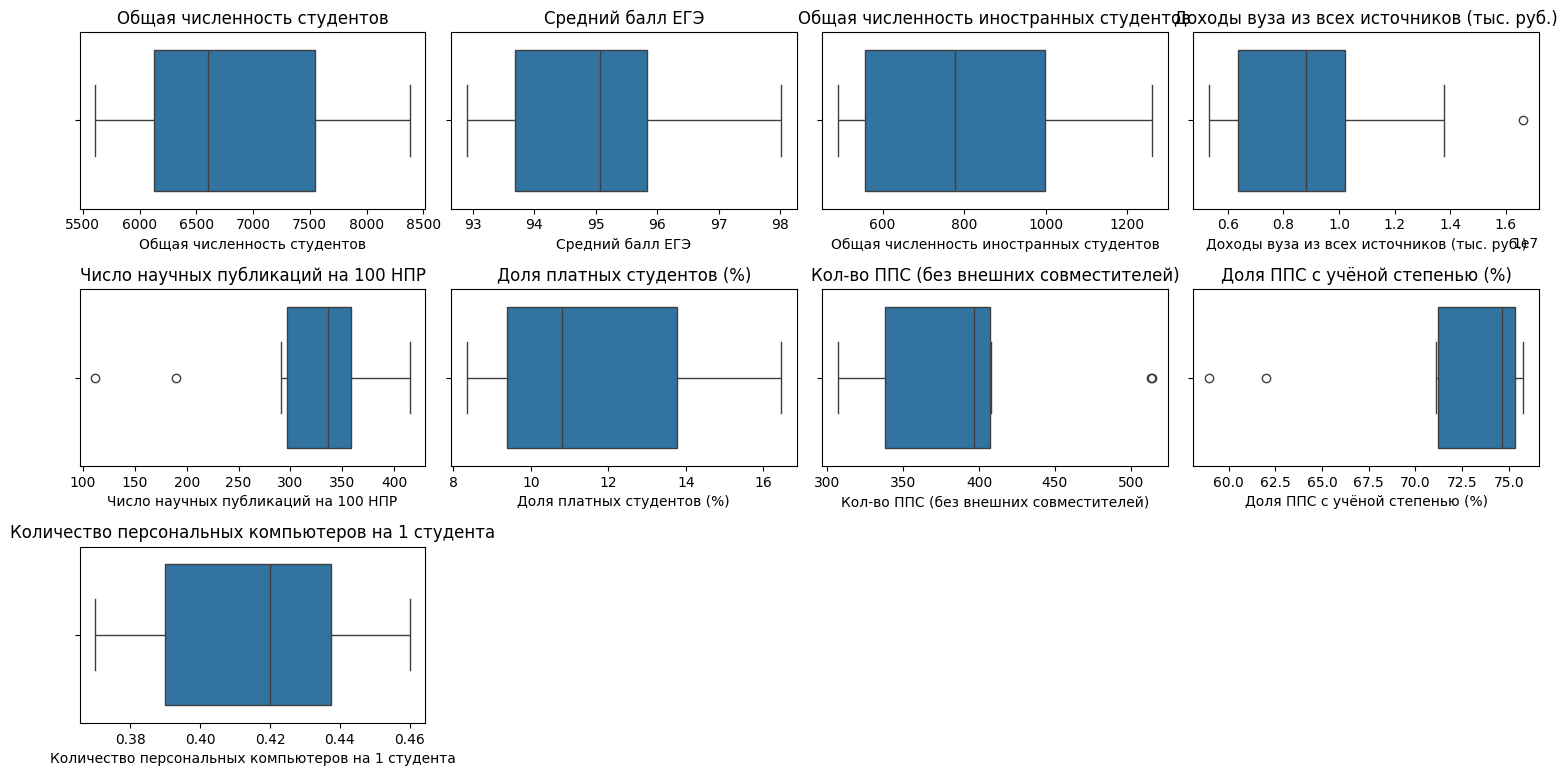

In [33]:
# Проверка на выбросы с использованием boxplot
# Визуальный поиск выбросов (с помощью графика boxplot)
plt.figure(figsize=(15,10)) # "шаблон" для будущих графикрв
for i, col in enumerate(c_cols, 1):
    plt.subplot(4,4,i) # 
    sns.boxplot(x=df_check[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

1. Метод "3-х сигм" для поиска выбросов

In [34]:
mean_d = df['Доходы вуза из всех источников (тыс. руб.)'].mean()
std_d = df['Доходы вуза из всех источников (тыс. руб.)'].std()
print(f"Доходы вуза из всех источников (тыс. руб.) не считается выбросом на интервале ({mean_d - 3 * std_d}, {mean_d + 3 * std_d})")

mean_pub = df['Число научных публикаций на 100 НПР'].mean()
std_pub = df['Число научных публикаций на 100 НПР'].std()
print(f"Число научных публикаций на 100 НПР не считается выбросом на интервале ({mean_pub - 3 * std_pub}, {mean_pub + 3 * std_pub})")

mean_s = df['Кол-во ППС (без внешних совместителей)'].mean()
std_s = df['Кол-во ППС (без внешних совместителей)'].std()
print(f"Кол-во ППС (без внешних совместителей) не считается выбросом на интервале ({mean_s - 3 * std_s}, {mean_s + 3 * std_s})")

mean_p = df['Доля ППС с учёной степенью (%)'].mean()
std_p = df['Доля ППС с учёной степенью (%)'].std()
print(f"Доля ППС с учёной степенью (%) не считается выбросом на интервале ({mean_p - 3 * std_p}, {mean_p + 3 * std_p})")


Доходы вуза из всех источников (тыс. руб.) не считается выбросом на интервале (-2018679.21545868, 20294186.375458684)
Число научных публикаций на 100 НПР не считается выбросом на интервале (29.90796273806876, 589.8360372619311)
Кол-во ППС (без внешних совместителей) не считается выбросом на интервале (172.99321277390598, 615.006787226094)
Доля ППС с учёной степенью (%) не считается выбросом на интервале (53.287318169598144, 89.63868183040185)


2. Метод IQR для поиска выбросов

In [35]:
Q1_d = df['Доходы вуза из всех источников (тыс. руб.)'].quantile(0.25)
Q3_d = df['Доходы вуза из всех источников (тыс. руб.)'].quantile(0.75)
IQR_d = Q3_d - Q1_d
print(f"Доходы вуза из всех источников (тыс. руб.) не считается выбросом на интервале ({Q1_d - 1.5 * IQR_d}, {Q3_d + 1.5 * IQR_d})")

Q1_pub = df['Число научных публикаций на 100 НПР'].quantile(0.25)
Q3_pub = df['Число научных публикаций на 100 НПР'].quantile(0.75)
IQR_pub = Q3_pub - Q1_pub
print(f"Число научных публикаций на 100 НПР не считается выбросом на интервале ({Q1_pub - 1.5 * IQR_pub}, {Q3_pub + 1.5 * IQR_pub})")

Q1_s = df['Кол-во ППС (без внешних совместителей)'].quantile(0.25)
Q3_s = df['Кол-во ППС (без внешних совместителей)'].quantile(0.75)
IQR_s = Q3_s - Q1_s
print(f"Кол-во ППС (без внешних совместителей) не считается выбросом на интервале ({Q1_s - 1.5 * IQR_s}, {Q3_s + 1.5 * IQR_s})")

Q1_p = df['Доля ППС с учёной степенью (%)'].quantile(0.25)
Q3_p = df['Доля ППС с учёной степенью (%)'].quantile(0.75)
IQR_p = Q3_p - Q1_p
print(f"Доля ППС с учёной степенью (%) не считается выбросом на интервале ({Q1_p - 1.5 * IQR_p}, {Q3_p + 1.5 * IQR_p})")

Доходы вуза из всех источников (тыс. руб.) не считается выбросом на интервале (555165.1000000006, 16017085.5)
Число научных публикаций на 100 НПР не считается выбросом на интервале (205.2312500000001, 449.66124999999994)
Кол-во ППС (без внешних совместителей) не считается выбросом на интервале (235.125, 510.125)
Доля ППС с учёной степенью (%) не считается выбросом на интервале (64.97874999999998, 81.54875000000003)


В дальнейшем исследовании мы будем использовать два набора данных: один с исходными данными, где есть выбросы, и второй — с обработанными данными, из которых выбросы убрали. Мы хотим узнать, как наличие или отсутствие выбросов влияет на точность прогнозирования моделей. После анализа сравним результаты для обеих версий данных, чтобы понять, как выбросы влияют на результаты исследования

In [36]:
df_1 = df.copy() # датафрейм, где выбросы остануться
df_2 = df.copy() # датафрейм, где выбросы будут устранены

При устранении выбросов будем учитывать границы нормальных значений, расчитанные с помощью метода IQR, т.к. данный метод более устойчив к выбросам при расчете границ. Используются два способа для работы с выбросами в данных: клиппинг и замену значений на медиану. У каждого метода есть свои плюсы и минусы, и выбор зависит от того, какие данные в столбцах

In [37]:
df_2['Доходы вуза из всех источников (тыс. руб.)'] = df_2['Доходы вуза из всех источников (тыс. руб.)'].clip(Q1_d - 1.5*IQR_d, Q3_d + 1.5*IQR_d)
df_2['Число научных публикаций на 100 НПР'] = df_2['Число научных публикаций на 100 НПР'].clip(Q1_pub - 1.5*IQR_pub, Q3_pub + 1.5*IQR_pub)
df_2['Кол-во ППС (без внешних совместителей)'] = df_2['Кол-во ППС (без внешних совместителей)'].clip(Q1_s - 1.5*IQR_s, Q3_s + 1.5*IQR_s)
median_paid = df_2['Доля ППС с учёной степенью (%)'].median()
df_2['Доля ППС с учёной степенью (%)'] = np.where(
    (df_2['Доля ППС с учёной степенью (%)'] < Q1_p - 1.5*IQR_p) | (df_2['Доля ППС с учёной степенью (%)'] > Q3_p + 1.5*IQR_p),
    median_paid,
    df_2['Доля ППС с учёной степенью (%)']
)

Смотрим на графике Boxplot устранение выбросов в df_2. Результат продемонстрирован в ячейке ниже

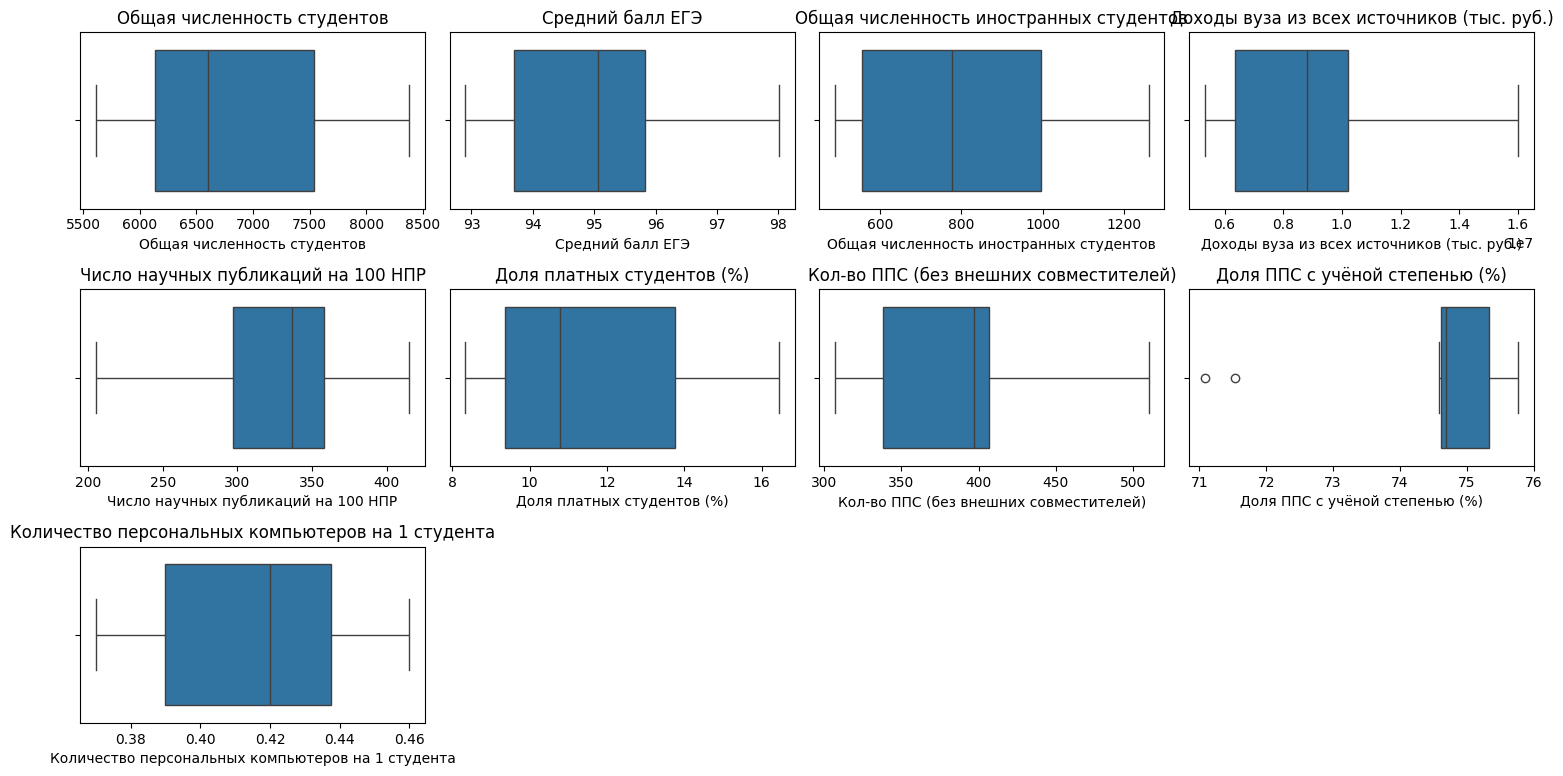

In [38]:
plt.figure(figsize=(15,10))
for i, col in enumerate(c_cols, 1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df_2[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

После успешного устранения выбросов у df_2 можно приступить к следующему шагу - корреляционный анализ

### 3. Корреляционный анализ

Далее построенны матрицы корреляции для df_1 (копия оригинального датафрейма с сохраненными выбросами) и df_2 (выбросы устранены) соответственно

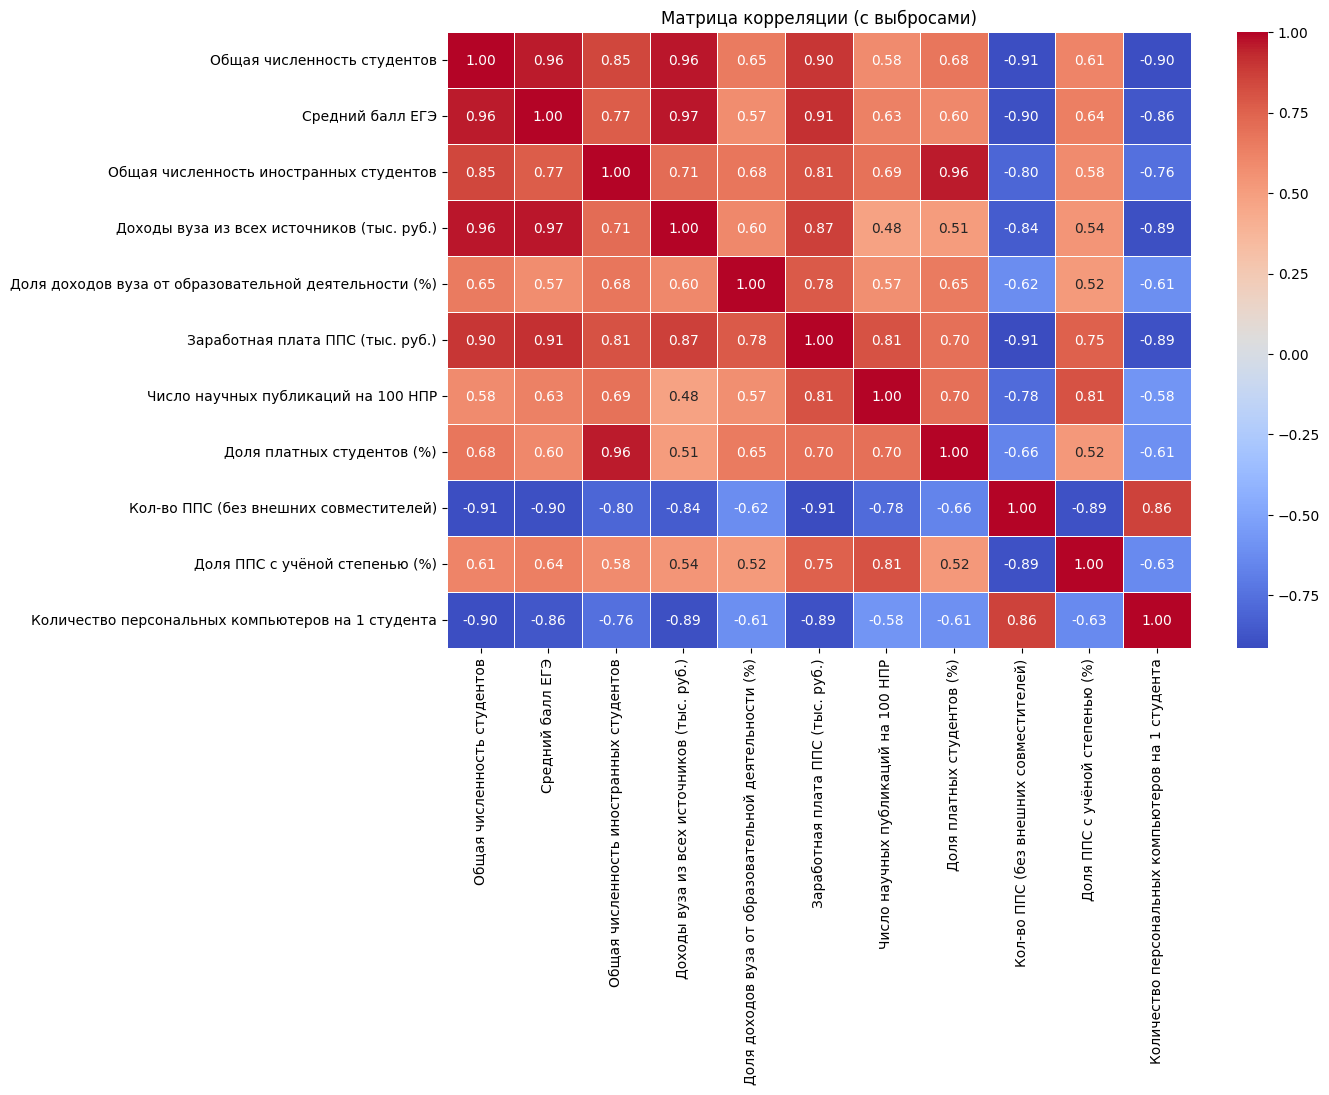

In [39]:
# Строим тепловую карту корреляций (для модели df_1)
plt.figure(figsize=(12, 8))
corr_matrix1 = df_1.corr(numeric_only=True)  # Только числовые колонки
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции (c выбросами)")
plt.show()

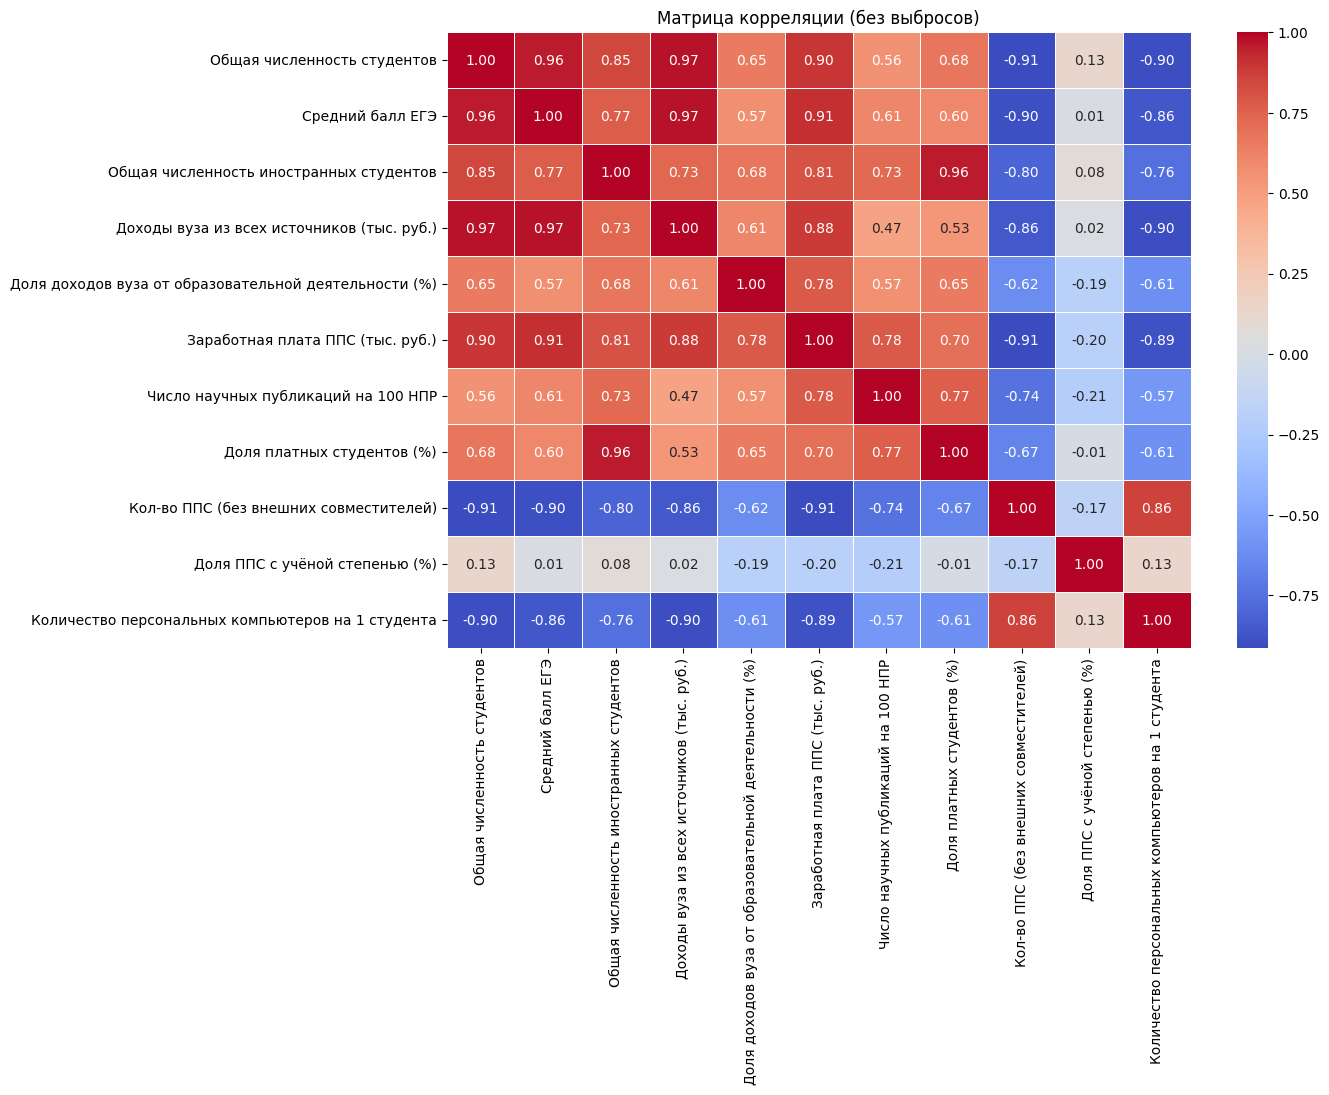

In [40]:
# Строим тепловую карту корреляций (для модели df_1)
plt.figure(figsize=(12, 8))
corr_matrix1 = df_2.corr(numeric_only=True)  # Только числовые колонки
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции (без выбросов)")
plt.show()

Анализируя матрицы корреляции, можно сделать несколько важных выводов относительно влияния выбросов на данные. Прежде всего, следует отметить, что существует высокая отрицательная корреляция с годом по большинству показателей, таких как "Общая численность студентов", "Число студентов (очная форма)" и "Площадь учебных помещений на 1 студента". Это значит, что в течение изучаемого времени эти цифры, похоже, уменьшаются. Удаление выбросов не влияет на эту корреляцию, что доказывает, что связь со временем стабильна.

С другой стороны, выбросы заметно влияют на корреляцию с другими переменными. Например, после удаления выбросов наблюдается снижение некоторых корреляций, таких как между "Доходы вуза из всех источников" и "Заработная плата ППС", где коэффициент корреляции снизился с 0.91 до 0.81. Это показывает, что выбросы искажают картину, и убрав их, мы можем лучше увидеть реальное положение дел. Удаление выбросов делает корреляции более устойчивыми и подходящими для анализа.

Несмотря на то, что в обеих матрицах корреляция между "Доля иностранных студентов" и "Общая численность иностранных студентов" остается высокой, наличие выбросов может завышать эту корреляцию. После их удаления мы можем точнее оценить, насколько эти переменные связаны. Это же касается других переменных, таких как "Заработная плата ППС" и "Число научных публикаций на 100 НПР", где выбросы также могли существенно повлиять на взаимосвязь.

В целом, удаление выбросов приводит к более стабильным и логичным корреляциям, и это позволяет более точно анализировать взаимосвязи между разными переменными

### 4. Машинное обучение

In [41]:
from sklearn.model_selection import train_test_split # библиотеки для разделения данных на обучающую и тестовую выборки
# Выделяем признаки и целевую переменную 
# для (df_1)
X_1 = df_1.drop(columns=['Общая численность студентов'])
y_1 = df_1['Общая численность студентов']
# для (df_2)
X_2 = df_2.drop(columns=['Общая численность студентов'])
y_2 = df_2['Общая численность студентов']

# Разделяем набор данных на обучающую (тренировочную) и тестовую выборки в соотношении 80/20  
# Для df_1 (с выбросами)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
# Для df_2 (с устранёнными выбросами)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Импортируем необходимые библиотеки для машинного обучения
from sklearn.linear_model import LinearRegression, Ridge # Библиотеки линейной регрессии и Лассо
from sklearn.ensemble import GradientBoostingRegressor # Градиентный бустинг
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.svm import SVR  # Импортируем Support Vector Regression (SVR)

# 1. Линейная регрессия
lr_model = LinearRegression()  # Создаем модель линейной регрессии
lr_model.fit(X_train_1, y_train_1)  # Обучаем модель на тренировочных данных
y_pred_lr = lr_model.predict(X_test_1)  # Прогнозируем на тестовых данных

# 2. Гребневая регрессия
ridge_model = Ridge(alpha=1.0)  # Создаем модель гребневой регрессии
ridge_model.fit(X_train_1, y_train_1) # обучаем модель на тренировочных данных
y_pred_ridge = ridge_model.predict(X_test_1) # Прогнозируем на тестовых данных

# 3. Метод опорных векторов (SVR)
svr_model = SVR(kernel='rbf')  # Создаем модель опорных векторов с ядром радиальной базисной функции (RBF)
svr_model.fit(X_train_1, y_train_1)  # Обучаем модель на тренировочных данных
y_pred_svr = svr_model.predict(X_test_1)  # Прогнозируем на тестовых данных

# Оценка качества моделей (MAE, RMSE, R², MAPE)
# Создаем ф-цию, которая считает данные параметры
# MAE - средняя абсолютная ошибка 
# RMSE - квадратный корень из средней квадратичной ошибки
# R² — Коэффициент детерминации
# MAPE — Средняя абсолютная ошибка в процентах
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mae, rmse, r2, mape
# Считаем сами параметры
mae_lr, rmse_lr, r2_lr, mape_lr = evaluate_model(y_test_1, y_pred_lr)
mae_ridge, rmse_ridge, r2_ridge, mape_ridge = evaluate_model(y_test_1, y_pred_ridge)
mae_svr, rmse_svr, r2_svr, mape_svr = evaluate_model(y_test_1, y_pred_svr)
# Выводим результаты
print(f"Линейна регрессия (df_1) MAE: {mae_lr}, RMSE: {rmse_lr}, R²: {r2_lr}, MAPE: {mape_lr}")
print(f"Гребневая регрессия (df_1) MAE: {mae_ridge}, RMSE: {rmse_ridge}, R²: {r2_ridge}, MAPE: {mape_ridge}")
print(f"Опорные векторы (df_1) MAE: {mae_svr}, RMSE: {rmse_svr}, R²: {r2_svr}, MAPE: {mape_svr}")

# комбинированная модель (взвешенное среднее)
# R^2 как веса для каждой модели
weigh = np.array([r2_lr, r2_ridge, r2_svr])  # Веса моделей, кладем их в массив
weigh = weigh / np.sum(weigh)  # Нормализвция весов (приведение к сумме = 1)
y_pred_combined = weigh[0] * y_pred_lr + weigh[1] * y_pred_ridge + weigh[2] * y_pred_svr # Комбинированное предсказание
# Оценка
mae_combined, rmse_combined, r2_combined, mape_combined = evaluate_model(y_test_1, y_pred_combined)
# Вывод результатов оценки комбинированной модели
print(f"Комбинированная модель (df_1) MAE: {mae_combined}, RMSE: {rmse_combined}, R²: {r2_combined}, MAPE: {mape_combined}")

Линейна регрессия (df_1) MAE: 189.6627951373398, RMSE: 218.37520456742476, R²: 0.9657223721622334, MAPE: 3.028297644495513
Гребневая регрессия (df_1) MAE: 205.963330839425, RMSE: 249.43554357606544, R²: 0.9552780442930677, MAPE: 3.3449861475337808
Опорные векторы (df_1) MAE: 1178.2514463599541, RMSE: 1261.5289367300943, R²: -0.1439276118985202, MAPE: 16.076650582355796
Комбинированная модель (df_1) MAE: 229.88483382788172, RMSE: 290.301456878872, R²: 0.9394237282946424, MAPE: 3.7827823402586502


In [42]:
# 1. Линейная регрессия для df_2
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train_2, y_train_2)
y_pred_lr_2 = lr_model_2.predict(X_test_2)

# 2. Гребневая регрессия для df_2
ridge_model_2 = Ridge(alpha=1.0)
ridge_model_2.fit(X_train_2, y_train_2)
y_pred_ridge_2 = ridge_model_2.predict(X_test_2)

# 3. Метод опорных векторов (SVR) для df_2
svr_model_2 = SVR(kernel='rbf')
svr_model_2.fit(X_train_2, y_train_2)
y_pred_svr_2 = svr_model_2.predict(X_test_2)

mae_lr_2, rmse_lr_2, r2_lr_2, mape_lr_2 = evaluate_model(y_test_2, y_pred_lr_2)
mae_ridge_2, rmse_ridge_2, r2_ridge_2, mape_ridge_2 = evaluate_model(y_test_2, y_pred_ridge_2)
mae_svr_2, rmse_svr_2, r2_svr_2, mape_svr_2 = evaluate_model(y_test_2, y_pred_svr_2)

print(f"Линейная регрессия (df_2) MAE: {mae_lr_2}, RMSE: {rmse_lr_2}, R²: {r2_lr_2}, MAPE: {mape_lr_2}")
print(f"Гребневая регрессия (df_2) MAE: {mae_ridge_2}, RMSE: {rmse_ridge_2}, R²: {r2_ridge_2}, MAPE: {mape_ridge_2}")
print(f"Опорные векторы (df_2) MAE: {mae_svr_2}, RMSE: {rmse_svr_2}, R²: {r2_svr_2}, MAPE: {mape_svr_2}")

weigh_2 = np.array([r2_lr_2, r2_ridge_2, r2_svr_2])
weigh_2 = weigh_2 / np.sum(weigh_2)
y_pred_combined_2 = weigh_2[0] * y_pred_lr_2 + weigh_2[1] * y_pred_ridge_2 + weigh_2[2] * y_pred_svr_2
mae_combined_2, rmse_combined_2, r2_combined_2, mape_combined_2 = evaluate_model(y_test_2, y_pred_combined_2)
print(f"Комбинированная модель (df_2) MAE: {mae_combined_2}, RMSE: {rmse_combined_2}, R²: {r2_combined_2}, MAPE: {mape_combined_2}")

Линейная регрессия (df_2) MAE: 194.0398974690611, RMSE: 259.1449854296835, R²: 0.951728618474788, MAPE: 3.2468668012421715
Гребневая регрессия (df_2) MAE: 177.75762546079068, RMSE: 243.98245126049827, R²: 0.9572120686691548, MAPE: 2.9982070556943596
Опорные векторы (df_2) MAE: 1178.231339352743, RMSE: 1261.5159781533353, R²: -0.14390411089557276, MAPE: 16.076317806292295
Комбинированная модель (df_2) MAE: 279.3148128110247, RMSE: 324.0434630594413, R²: 0.9245236935333887, MAPE: 4.471625357728121


Для дальнейшей работы используем df_1

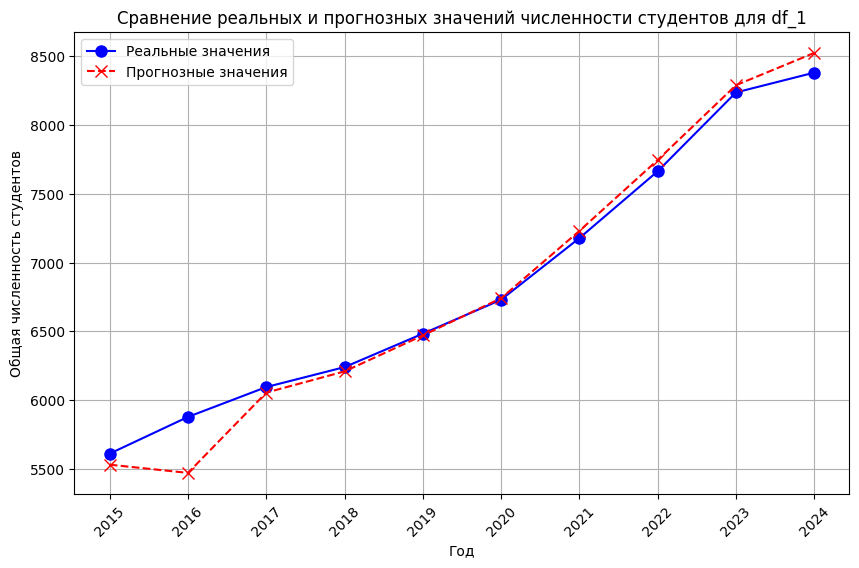

In [43]:
# Прогнозируем для всего набора данных (df_1)
# Это для того, чтоб можно было визуально сравнить спрогнозированные значения с реальными (историческими) значениями
y_pred_lr_all_1 = lr_model.predict(X_1)  # Линейная регрессия для df_1
y_pred_ridge_all_1 = ridge_model.predict(X_1)  # Гребневая регрессия для df_1
y_pred_svr_all_1 = svr_model.predict(X_1)  # Метод опорных векторов для df_1

# Вычисляем комбинированное предсказание для всех данных (df_1)
y_pred_combined_all_1 = weigh[0] * y_pred_lr_all_1 + weigh[1] * y_pred_ridge_all_1 + weigh[2] * y_pred_svr_all_1  # Сравнение реальных и прогнозных значений для всего набора данных

# Строим график
plt.figure(figsize=(10, 6))

# Используем индекс df_1 для оси X
plt.plot(df_1.index, df_1['Общая численность студентов'], label='Реальные значения', color='blue', marker='o', linestyle='-', markersize=8)
plt.plot(df_1.index, y_pred_combined_all_1, label='Прогнозные значения', color='red', linestyle='--', marker='x', markersize=8)
plt.xticks(df_1.index, rotation=45)
plt.xlabel('Год')
plt.ylabel('Общая численность студентов')
plt.title('Сравнение реальных и прогнозных значений численности студентов для df_1')
plt.legend()
plt.grid(True)
plt.show()

### 5. Построение прогноза на будущее

Прогноз численности студентов для df_1 на 2025 год (комбинированная модель): 8857


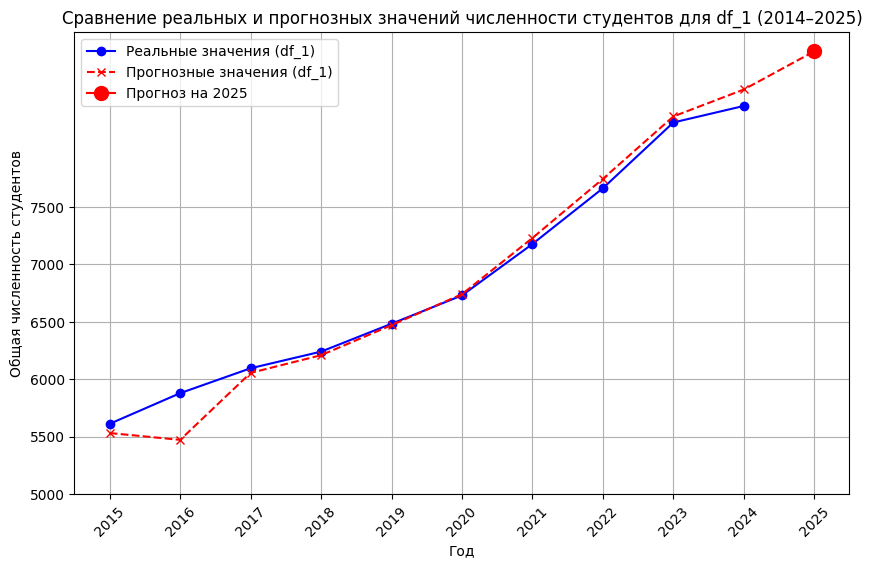

In [44]:
# Подготовка данных для 2025 года для df_1
last_year_data_1 = df_1.loc[2024]  # Последние известные данные (2024) для df_1
features_1 = df_1.drop(columns=['Общая численность студентов']).columns # Удаляем целевую переменную (Общая численность студентов) и получаем список остальных признаков, по которым будем строить прогноз
# features_1 — список признаков (всех, кроме целевой переменной)

# Экстраполяция - средний прирост за последние 10 лет (2014–2024) для df_1
recent_years_1 = df_1.loc[2014:2024] # Выбираем последние 10 лет для подсчёта среднего прироста
mean_changes_1 = recent_years_1.diff().mean()  # Средний прирост для каждого признака
forecast_2025_1 = last_year_data_1.copy() # создание копии строки с данными за 2024 год, чтобы на ее основе сформировать прогноз на 2025 год

# Экстраполируем каждый признак
# тут создается "воображаемая" строка для 2025 года, где каждый признак — это значение 2024 + среднее изменение за 3 года
for col in features_1:
    if col != 'Год':  # исключаем столбец кода из обработки, его отдельно зададим ниже
        forecast_2025_1[col] = last_year_data_1[col] + mean_changes_1[col] # берем значение признака за 2024 год, прибавляем к нему средний прирост по этому признаку, записываем это как прогнозное значение признака на 2025 год
forecast_2025_1['Год'] = 2025 # отдельно задается 'Год' тут

# Преобразуем в DataFrame для предсказания для df_1
X_2025_1 = pd.DataFrame([forecast_2025_1[features_1]], columns=features_1)

# Прогноз для 2025 года с использованием всех моделей для df_1
y_pred_lr_2025_1 = lr_model.predict(X_2025_1)[0]
y_pred_ridge_2025_1 = ridge_model.predict(X_2025_1)[0]
y_pred_svr_2025_1 = svr_model.predict(X_2025_1)[0]
# индекс [0] используется для того, чтобы извлечь 1-ое (и в данном случае единственное) значение из результата, возвращаемого методами .predict() для каждой из моделей

# Комбинированный прогноз для 2025 года для df_1
y_pred_combined_2025_1 = weigh[0] * y_pred_lr_2025_1 + weigh[1] * y_pred_ridge_2025_1 + weigh[2] * y_pred_svr_2025_1

# Вывод прогноза для df_1 на 2025 год
print(f"Прогноз численности студентов для df_1 на 2025 год (комбинированная модель): {int(y_pred_combined_2025_1)}")

# Подготовка данных для графика для df_1
years_historical_1 = df_1.index # ось X — годы
students_historical_1 = df_1['Общая численность студентов'] # Y — численность
years_forecast_1 = np.append(df_1.index, 2025) # Добавление 2025 года в массив
students_forecast_1 = np.append(y_pred_combined_all_1, y_pred_combined_2025_1) # добавление предсказания кол-ва студентов в 2025 году

# Построение графика для df_1
plt.figure(figsize=(10, 6))
plt.plot(years_historical_1, students_historical_1, label='Реальные значения (df_1)', color='blue', linestyle='-', marker='o')
plt.plot(years_forecast_1, students_forecast_1, label='Прогнозные значения (df_1)', color='red', linestyle='--', marker='x')
plt.plot(2025, y_pred_combined_2025_1, marker='o', color='red', markersize=10, label='Прогноз на 2025')
plt.xticks(years_forecast_1, rotation=45)
plt.yticks(np.arange(5000, 8000, 500))
plt.xlabel('Год')
plt.ylabel('Общая численность студентов')
plt.title('Сравнение реальных и прогнозных значений численности студентов для df_1 (2014–2025)')
plt.legend()
plt.grid(True)
plt.show()

### 6. ARIMA

ADF p-value: 0.0738 (стационарность: False)
Лучшие параметры ARIMA: (1, 1, 0), AIC: 121.92
Прогнозируемое число студентов на 2025 год: 8495

Метрики качества модели на исторических данных (2015–2024):
MAE: 672.55
RMSE: 1780.90
R²: -2.6840
MAPE: 11.48%


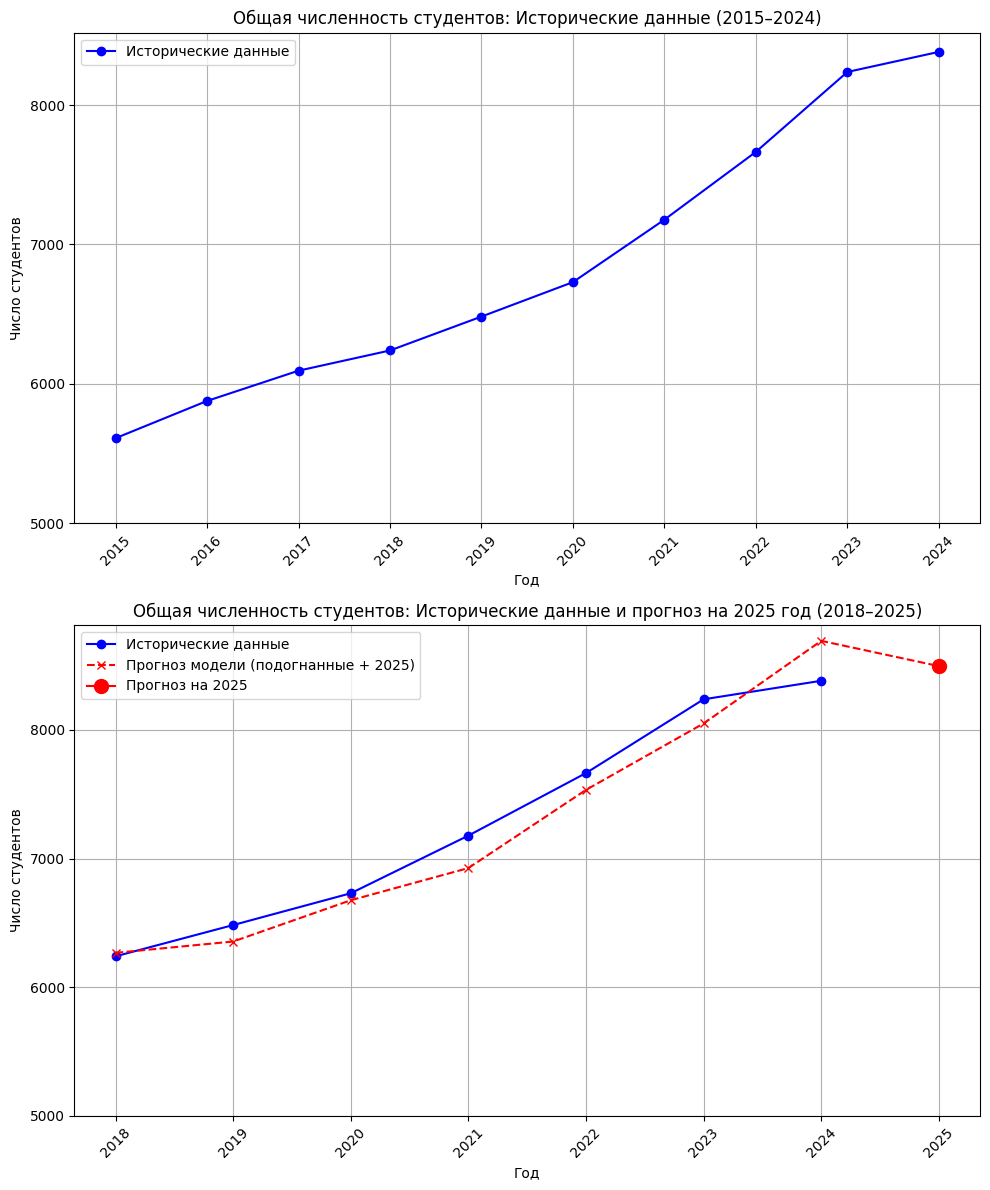

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import warnings
warnings.filterwarnings("ignore")

# Новая таблица данных
data = {
    'Год': [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015],
    'Общая численность студентов': [8381, 8237, 7664, 7178, 6730, 6483, 6240, 6095, 5878, 5611],
    'Средний балл ЕГЭ': [98.01, 97.13, 95.81, 95.83, 95.57, 94.56, 93.43, 94.45, 93.08, 92.90],
    'Общая численность иностранных студентов': [887, 1168, 1261, 1034, 844, 713, 601, 541, 490, 521],
    'Доходы вуза из всех источников (тыс. руб.)': [16628292.9, 13760323.2, 10449045.6, 9528324.6, 9351851.8, 8245492.9, 6444418.3, 6323040.9, 5323372.8, 5323372.8],
    'Доля доходов вуза от образовательной деятельности (%)': [42.55, 39.41, 42.68, 41.89, 42.08, 38.52, 42.20, 31.47, 34.45, 34.45],
    'Заработная плата ППС (тыс. руб.)': [218.59, 201.75, 188.87, 179.95, 189.46, 166.99, 139.48, 120.41, 83.49, 69.31],
    'Число научных публикаций на 100 НПР': [313.85, 338.41, 415.08, 363.48, 399.21, 334.41, 291.24, 341.56, 189.64, 111.84],
    'Доля платных студентов (%)': [10.58, 14.18, 16.45, 14.41, 12.54, 11.00, 9.63, 8.88, 8.34, 9.29],
    'Кол-во ППС (без внешних совместителей)': [307, 309, 331, 360, 404, 408, 402, 392, 514, 513],
    'Доля ППС с учёной степенью (%)': [74.59, 75.40, 75.23, 74.72, 71.53, 71.08, 75.37, 75.77, 58.95, 61.99],
    'Количество персональных компьютеров на 1 студента': [0.37, 0.37, 0.39, 0.42, 0.42, 0.39, 0.43, 0.44, 0.46, 0.45]
}

# Создание DataFrame
df = pd.DataFrame(data)
df['Год'] = pd.to_datetime(df['Год'], format='%Y')
df.set_index('Год', inplace=True)
df.sort_index(inplace=True)

# Пропуски отсутствуют, интерполяция не требуется
data = df['Общая численность студентов']

# Проверка стационарности с помощью теста ADF
result = adfuller(data)
p_value = result[1]
print(f"ADF p-value: {p_value:.4f} (стационарность: {p_value <= 0.05})")

# Диапазоны параметров для подбора
p_range = range(0, 3)  # AR: 0, 1, 2
d_range = range(0, 2)  # Diff: 0, 1
q_range = range(0, 6)  # MA: 0, 1, 2, 3, 4, 5

# Подбор оптимальных параметров ARIMA
def find_best_arima_params(data, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None
    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(data, order=(p, d, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, d, q)
        except:
            continue
    return best_order, best_aic

best_order, best_aic = find_best_arima_params(data, p_range, d_range, q_range)
print(f"Лучшие параметры ARIMA: {best_order}, AIC: {best_aic:.2f}")

# Обучение модели ARIMA с лучшими параметрами
model = ARIMA(data, order=best_order)
model_fit = model.fit()

# Прогноз на 2025 год
forecast = model_fit.forecast(steps=1)
forecast_2025 = int(round(forecast.iloc[0])) if not forecast.empty else None

# Получение подогнанных значений для исторических данных
fitted_values = model_fit.fittedvalues

# Расчёт метрик качества на исторических данных
y_true = data
y_pred = fitted_values
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Подготовка данных для графиков
исторические_годы = data.index.year
исторические_значения = data.values
подогнанные_значения = fitted_values.values
год_прогноза = np.append(исторические_годы, 2025)
значения_прогноза = np.append(подогнанные_значения, forecast_2025)

# Обрезка данных для второго графика (2018–2025)
mask = исторические_годы >= 2018
исторические_годы_обрезанные = исторические_годы[mask]
исторические_значения_обрезанные = исторические_значения[mask]
подогнанные_значения_обрезанные = подогнанные_значения[mask]
год_прогноза_обрезанные = np.append(исторические_годы_обрезанные, 2025)
значения_прогноза_обрезанные = np.append(подогнанные_значения_обрезанные, forecast_2025)

# Создание двух графиков
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# График 1: Полный исторический ряд (2015–2024)
ax1.plot(исторические_годы, исторические_значения, marker='o', linestyle='-', color='blue', label='Исторические данные')
ax1.set_title('Общая численность студентов: Исторические данные (2015–2024)')
ax1.set_xlabel('Год')
ax1.set_ylabel('Число студентов')
ax1.set_xticks(исторические_годы)
ax1.set_yticks(np.arange(5000, 9000, 1000))  # Деления с шагом 1000
ax1.tick_params(axis='x', rotation=45)
ax1.legend()
ax1.grid(True)

# График 2: Обрезанный ряд (2018–2024) + прогноз
ax2.plot(исторические_годы_обрезанные, исторические_значения_обрезанные, marker='o', linestyle='-', color='blue', label='Исторические данные')
ax2.plot(год_прогноза_обрезанные, значения_прогноза_обрезанные, linestyle='--', color='red', marker='x', label='Прогноз модели (подогнанные + 2025)')
ax2.plot(год_прогноза_обрезанные[-1], значения_прогноза_обрезанные[-1], marker='o', color='red', markersize=10, label='Прогноз на 2025')
ax2.set_title('Общая численность студентов: Исторические данные и прогноз на 2025 год (2018–2025)')
ax2.set_xlabel('Год')
ax2.set_ylabel('Число студентов')
ax2.set_xticks(год_прогноза_обрезанные)
ax2.set_yticks(np.arange(5000, 9000, 1000))  # Деления с шагом 1000
ax2.tick_params(axis='x', rotation=45)
ax2.legend()
ax2.grid(True)

plt.tight_layout()

# Вывод прогноза и метрик
if forecast_2025 is not None:
    print(f"Прогнозируемое число студентов на 2025 год: {forecast_2025}")

print("\nМетрики качества модели на исторических данных (2015–2024):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# Показать графики
plt.show()

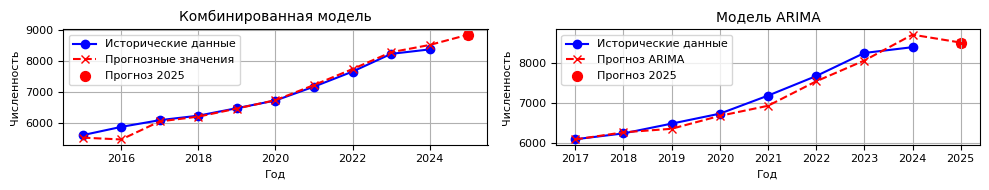

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Подготовка данных для комбинированной модели
years_c = np.append(years_historical_1, 2025)
pred_c = np.append(y_pred_combined_all_1, y_pred_combined_2025_1)

# Подготовка данных для ARIMA (с 2017 года)
mask = исторические_годы >= 2017
years_a = np.append(исторические_годы[mask], 2025)
pred_a = np.append(подогнанные_значения[mask], forecast_2025)

# Рисуем два графика рядом с уменьшенным размером холста
fig, axes = plt.subplots(1, 2, figsize=(10, 2))  # более компактный размер

# Комбинированная модель
axes[0].plot(years_historical_1, students_historical_1, color='blue', marker='o', linestyle='-', label='Исторические данные')
axes[0].plot(years_c, pred_c, color='red', linestyle='--', marker='x', label='Прогнозные значения')
axes[0].scatter(2025, y_pred_combined_2025_1, color='red', s=50, label='Прогноз 2025')
axes[0].set_title('Комбинированная модель', fontsize=10)
axes[0].set_xlabel('Год', fontsize=8)
axes[0].set_ylabel('Численность', fontsize=8)
axes[0].tick_params(axis='both', labelsize=8)
axes[0].legend(fontsize=8)
axes[0].grid(True)

# ARIMA модель
axes[1].plot(исторические_годы[mask], исторические_значения[mask], color='blue', marker='o', linestyle='-', label='Исторические данные')
axes[1].plot(years_a, pred_a, color='red', linestyle='--', marker='x', label='Прогноз ARIMA')
axes[1].scatter(2025, forecast_2025, color='red', s=50, label='Прогноз 2025')
axes[1].set_title('Модель ARIMA', fontsize=10)
axes[1].set_xlabel('Год', fontsize=8)
axes[1].set_ylabel('Численность', fontsize=8)
axes[1].tick_params(axis='both', labelsize=8)
axes[1].legend(fontsize=8)
axes[1].grid(True)

plt.tight_layout()
plt.show()